# Feature Engineering & Model Selection

##### [TOTAL POINTS: 22]

## Learning Objectives

By the end of this assignment, students should be able to:

- Apply necessary preprocessing steps to prepare the data for modeling.
- Perform feature engineering such as handling missing values, binning numerical variables, and extracting new features.
- Train and fine-tune a **Decision Tree classifier** using **scikit-learn**, and evaluate it using **cross-validation** and **validation splits**.
- Evaluate and compare multiple classification models (e.g., **Random Forest**, **XGBoost**) and build an effective **ensemble model**.

## Problem Description

The **Titanic** was a British passenger liner that tragically sank during its maiden voyage in 1912. The dataset you'll work with contains information about the passengers on board — such as their age, sex, ticket class, and whether they survived.

Your task is to build a machine learning pipeline to **predict whether a passenger survived the Titanic disaster** using the provided features. Throughout the assignment, you will preprocess the data, engineer meaningful features, build various classifiers, and evaluate their performance.

Let’s begin by importing the necessary libraries.


In [1]:
# !pip install pandas numpy matplotlib seaborn scikit-learn xgboost scikit-optimize -q

In [2]:
# Task: Import necessary libraries for data analysis 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

%matplotlib inline
sns.set()

### Load the Dataset <span style="float: right;">[1 pt]</span>

Load the `train.csv` and `test.csv` files using pandas.


In [6]:
### Ex-1-Task-1
# Load the Titanic dataset

df_train = None
df_test = None

### BEGIN SOLUTION 
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
### END SOLUTION

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# INTENTIONALLY LEFT BLANK

### Store Target & Concatenate Datasets <span style="float: right;">[1 pt]</span>

- Store the `Survived` column from the training set into a separate variable.
- Concatenate the training set (without the `Survived` column) and the test set into a single DataFrame called `data`.


In [8]:
### Ex-1-Task-2
# Task: Store the target variable in a separate variable and concatenate train and test data

survived_train = None
data = None

### BEGIN SOLUTION 
survived_train = df_train["Survived"]
data = pd.concat([df_train.drop("Survived", axis=1), df_test], axis=0, ignore_index=True)
### END SOLUTION

In [9]:
# INTENTIONALLY LEFT BLANK

In [10]:
# Task: View basic info of the concatenated dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


### Extract Title from Name <span style="float: right;">[2 pts]</span>

Extract the passenger's title (such as **Mr**, **Mrs**, **Miss**, etc.) from the `Name` column using a regular expression,  
and store it in a new column called `Title`.

For example, given names like:

- `Braund, Mr. Owen Harris` → Title: `Mr`
- `Heikkinen, Miss. Laina` → Title: `Miss`

Use a regex pattern that captures the word that appears between a space and a period following the surname.


In [11]:
### Ex-2-Task-1
# Task: Extract 'Title' from Name column and plot distribution

data['Title'] = None

### BEGIN SOLUTION
import re 

data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
### END SOLUTION

In [12]:
# INTENTIONALLY LEFT BLANK

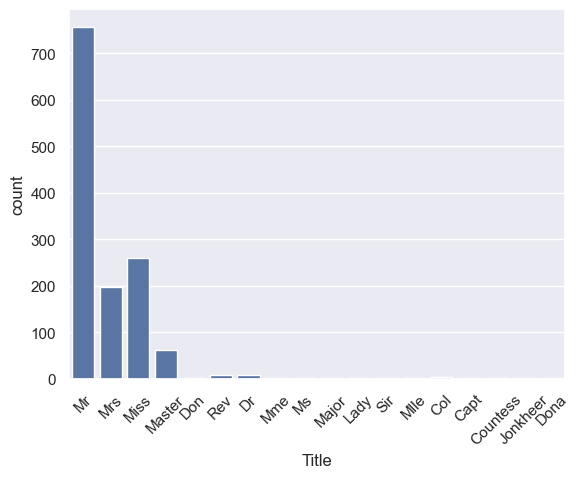

In [13]:
# Task: Plot the title count
sns.countplot(x='Title', data=data)
plt.xticks(rotation=45)
plt.show()

### Normalize and Group Titles <span style="float: right;">[2 pts]</span>

- Normalize similar titles by replacing:

  - `'Mlle'` with `'Miss'`
  - `'Mme'` with `'Mrs'`
  - `'Ms'` with `'Miss'`

- Then, group rare titles such as `'Don'`, `'Dona'`, `'Rev'`, `'Dr'`, `'Major'`, `'Lady'`, `'Sir'`, `'Col'`, `'Capt'`, `'Countess'`, and `'Jonkheer'` into a single category called `'Special'`.


In [14]:
### Ex-2-Task-2
# Task: Normalize rare titles to 'Special' and others

### BEGIN SOLUTION 
data['Title'] = data['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs'
})

special_titles = [
    'Don', 'Dona', 'Rev', 'Dr', 'Major', 'Lady', 'Sir',
    'Col', 'Capt', 'Countess', 'Jonkheer'
]

data['Title'] = data['Title'].apply(lambda x: 'Special' if x in special_titles else x)
### END SOLUTION

In [15]:
# INTENTIONALLY LEFT BLANK

### Create Binary Cabin Indicator <span style="float: right;">[1 pt]</span>

Create a new binary column `Has_Cabin` that indicates whether a passenger has cabin information (`True` if present, `False` if missing).


In [16]:
### Ex-3-Task-1
# Task: Add a binary column for presence of Cabin info

data['Has_Cabin'] = None

### BEGIN SOLUTION 
data['Has_Cabin'] = data['Cabin'].notna()
### END SOLUTION

In [17]:
# INTENTIONALLY LEFT BLANK

In [18]:
# Task: Drop irrelevant columns
data.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)

### Impute Missing Values <span style="float: right;">[2 pts]</span>

Fill missing values in the dataset as follows:

- Replace missing `Age` values with the median age.
- Replace missing `Fare` values with the median fare.
- Replace missing `Embarked` values with the most common port `'S'`.


In [19]:
### Ex-4-Task-1
# Task: Impute missing values in Age, Fare, Embarked

### BEGIN SOLUTION 
data['Age'] = data['Age'].fillna(data['Age'].median())

data['Fare'] = data['Fare'].fillna(data['Fare'].median())

data['Embarked'] = data['Embarked'].fillna('S')

### END SOLUTION


In [20]:
# INTENTIONALLY LEFT BLANK

### Bin Age and Fare into Categories <span style="float: right;">[2 pts]</span>

- Convert the numerical columns `Age` and `Fare` into categorical variables by dividing them into 4 equal-sized groups (quartiles).
- Store the group labels in new columns `CatAge` and `CatFare`.
- Drop the original `Age` and `Fare` columns after binning.


In [21]:
### Ex-4-Task-2
# Task: Bin Age and Fare into categorical variables

data['CatAge'] = None
data['CatFare'] = None

### BEGIN SOLUTION 
data['CatAge'] = pd.qcut(data['Age'], q=4, labels=False)
data['CatFare'] = pd.qcut(data['Fare'], q=4, labels=False)

data.drop(['Age', 'Fare'], axis=1, inplace=True)
### END SOLUTION

In [22]:
# INTENTIONALLY LEFT BLANK

### Create Family Size and Drop Columns <span style="float: right;">[1 pt]</span>

Create a new column `Fam_Size` by summing `SibSp` and `Parch`, then drop the original `SibSp` and `Parch` columns.


In [23]:
### Ex-5-Task-1 
# Task: Create family size and drop SibSp, Parch

### BEGIN SOLUTION 
data['Fam_Size'] = data['SibSp'] + data['Parch']

data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
### END SOLUTION

In [24]:
# INTENTIONALLY LEFT BLANK

### One-Hot Encode Categorical Variables <span style="float: right;">[1 pt]</span>

Convert categorical variables into one-hot encoded dummy variables, dropping the first category to avoid multicollinearity.


In [25]:
### Ex-5-Task-2

data_dum = None

### BEGIN SOLUTION 
data_dum = pd.get_dummies(data, drop_first=True)
### END SOLUTION

In [26]:
# INTENTIONALLY LEFT BLANK

In [27]:
# Task: Split data into training and test sets
data_train = data_dum.iloc[:891]
data_test = data_dum.iloc[891:]

X = data_train.values
test = data_test.values
y = survived_train.values

### Tune Decision Tree with RandomizedSearchCV <span style="float: right;">[3 pts]</span>

- Use `RandomizedSearchCV` to tune a `DecisionTreeClassifier`’s `max_depth` parameter, searching over values from 1 to 9, with a fixed random seed.
- Perform 5 iterations with 5-fold cross-validation and fit the model to the training data.

**Note:** Import libraries inside `begin solution` and `end solution`


In [28]:
### Ex-6-Task-1

seed=42
np.random.seed(seed)

param_dist = {}
clf = None     # Decision Tree Classifier 
clf_cv = None  # Randomized Search CV

### BEGIN SOLUTION
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

param_dist = {'max_depth': list(range(1, 9))}
clf = DecisionTreeClassifier(random_state=seed)
clf_cv = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=5,
    cv=5,
    random_state=seed
)
clf_cv.fit(data_dum.loc[:len(survived_train)-1], survived_train)
### END SOLUTION

print("Tuned Decision Tree Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 3}
Best score is 0.8293766869625259


In [29]:
# INTENTIONALLY LEFT BLANK

### Tune Random Forest with RandomizedSearchCV <span style="float: right;">[3 pts]</span>

Use `RandomizedSearchCV` to tune a `RandomForestClassifier` with parameters:

- `n_estimators`: [50, 100, 200]
- `max_depth`: [None, 3, 5, 10]
- `max_features`: ['sqrt', 'log2']

Use a fixed random seed, run 5 iterations with 5-fold cross-validation, and fit the model.


In [30]:
### Ex-6-Task-2

rf_param_dist = {}
rf = None     # Random Forest Classifier 
rf_cv = None  # Randomized Search CV

### BEGIN SOLUTION 
from sklearn.ensemble import RandomForestClassifier

seed = 42

rf_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 10],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=seed)
rf_cv = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_dist,
    n_iter=5,
    cv=5,
    random_state=seed,
    n_jobs=-1
)

rf_cv.fit(data_dum.loc[:len(survived_train)-1], survived_train)
### END SOLUTION

print("Best RF Params:", rf_cv.best_params_)
print("Best CV Score:", rf_cv.best_score_)

Best RF Params: {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 5}
Best CV Score: 0.8226539451384095


In [31]:
# INTENTIONALLY LEFT BLANK

### Tune XGBoost with Bayesian Optimization <span style="float: right;">[3 pts]</span>

Use `BayesSearchCV` from `scikit-optimize` to tune an `XGBClassifier`.  
Search over the following hyperparameter space:

- `max_depth`: integers between 3 and 8
- `n_estimators`: integers between 50 and 100
- `learning_rate`: log-uniformly between 0.01 and 0.2

Use 5-fold cross-validation, a fixed random seed, and 20 iterations. Then, fit the model.


In [33]:
### Ex-6-Task-3

param_space = {}      # Parameter Distribuition for BayesSearchCV
xgb_model = None      # Random Forest Classifier 
xgb_cv = None         # BayesSearchCV

### BEGIN SOLUTION 
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Integer, Real

seed = 42

param_space = {
    'max_depth': Integer(3, 8),
    'n_estimators': Integer(50, 100),
    'learning_rate': Real(0.01, 0.2, prior='log-uniform')
}

xgb_model = XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='logloss')

xgb_cv = BayesSearchCV(
    estimator=xgb_model,
    search_spaces=param_space,
    n_iter=20,
    cv=5,
    random_state=seed,
    n_jobs=-1
)

xgb_cv.fit(data_dum.loc[:len(survived_train)-1], survived_train)
### END SOLUTION

print("Best XGBoost Params:", xgb_cv.best_params_)
print("Best CV Score:", xgb_cv.best_score_)

Best XGBoost Params: OrderedDict([('learning_rate', 0.016116184046383267), ('max_depth', 3), ('n_estimators', 100)])
Best CV Score: 0.8316238779737619


c:\Users\acer\Desktop\fuse_ml\env\lib\site-packages\xgboost\core.py:158: UserWarning: [20:49:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [34]:
# INTENTIONALLY LEFT BLANK